# 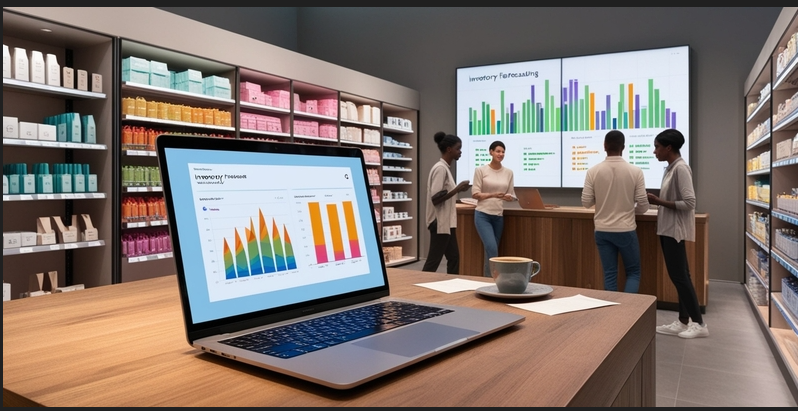

# Import library 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# EDA

In [ ]:
df=pd.read_csv("../data/retail_store_inventory.csv")

In [ ]:
df.head()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and add it as a new column
df['Year'] = df['Date'].dt.year

# Display the updated DataFrame
print(df.head())

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df)

In [ ]:
 
df.hist(figsize=(14, 8))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()


In [ ]:
sns.set_style("darkgrid")
 
plt.figure(figsize=(12, 8))

 
sns.countplot(x="Region", hue="Category", data=df)

 
plt.show()

In [ ]:
# Set the figure size
custom_palette = ["red", "green", "orange", "blue"]
 

sns.set_palette(custom_palette)
plt.figure(figsize=(12, 8))

# Create a line plot
sns.lineplot(
    x="Year", 
    y="Price", 
    hue="Region", 
    marker="o",  # Add markers
    data=df
)

# Add labels and a title
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price over years")

# Display the plot
plt.show()

In [ ]:
#simple

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(df["Year"], df["Price"], label="Price", color="green")
ax.plot(df["Year"], df["Competitor Pricing"], label="Competitor Pricing", color="red")

ax.set_xlabel("Time (years)")
ax.set_ylabel("Price vs Competitor Pricing")

plt.legend(title="Category")

plt.show()



In [ ]:
 
plt.figure(figsize=(14, 8))

sns.lineplot(
    x="Year", 
    y="Price", 
    label="Price", 
    data=df,
    
     
)

sns.lineplot(
    x="Year", 
    y="Competitor Pricing", 
    label="Competitor Pricing", 
    data=df, 
   
)

plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Price vs Competitor Pricing Over Time")
plt.legend()

plt.show()


In [ ]:
 
sns.boxplot(data=df[["Price", "Competitor Pricing"]])

plt.xlabel("Category")
plt.ylabel("Values")
plt.title("Boxplot of Price vs Competitor Pricing")

plt.show()


In [ ]:
#measure by MEAN
plt.figure(figsize=(12, 6))

 
g = sns.catplot(
    x="Weather Condition", 
    y="Units Sold", 
    hue="Category",
    kind="bar",
    data=df
)

 
g.fig.suptitle("(measure by MEAN)Average Units Sold vs Weather Condition", fontsize=16)

 
plt.show()



In [ ]:
 
# Measure by MEAN
plt.figure(figsize=(12, 6))
 
g = sns.catplot(
    x="Discount", 
    y="Units Sold", 
    hue="Category", 
    kind="bar", 
    data=df
)

# Add the title for the plot
g.fig.suptitle("(measure by MEAN)Total Units Sold vs Discount by Category", fontsize=16)

# Show the plot
plt.show()


In [ ]:
 
plt.figure(figsize=(12, 6))

sns.relplot(
    x="Weather Condition", 
    y="Discount", 
    hue="Category",
    kind="scatter",
    data=df

)

 
plt.title('(measure by MEAN)Discount by Weather Condition and Category')
plt.xlabel('Weather Condition')
plt.ylabel('Discount')

 
plt.show()


In [ ]:
#measure by SUM 
import seaborn as sns
import matplotlib.pyplot as plt

 
df_sum = df.groupby(["Discount", "Category"])["Units Sold"].sum().reset_index()

plt.figure(figsize=(12, 6))

 
g = sns.catplot(
    x="Discount", 
    y="Units Sold", 
    hue="Category",
    kind="bar",
    data=df_sum
)

 
g.fig.suptitle("(measure by SUM)Total Units Sold vs Discount by Category", fontsize=16)

 
plt.show()



In [ ]:
#measure by SUM 
df_sum2 = df.groupby(["Weather Condition", "Category"])["Units Sold"].sum().reset_index()

plt.figure(figsize=(12, 6))

 
g = sns.catplot(
    x="Weather Condition", 
    y="Units Sold", 
    hue="Category", 
    kind="bar", 
    data=df_sum2
)

 
g.fig.suptitle("(measure by SUM)Total Units Sold vs Weather Condition", fontsize=16)

 
plt.show()



In [ ]:


plt.figure(figsize=(12, 6))
sns.scatterplot(x="Demand Forecast", y="Discount", data=df)

plt.title("Relationship Between Demand Forecast and Discount")
plt.xlabel("Demand Forecast")
plt.ylabel("Discount")
plt.show()


# Model

In [ ]:
df.head()

In [ ]:
dftocorr=df
Lbl = LabelEncoder()
columns_to_encode = ["Seasonality", "Weather Condition", "Region", "Category"]
dftocorr[columns_to_encode] = dftocorr[columns_to_encode].apply(Lbl.fit_transform)
dftocorr

In [ ]:
dftocorr=dftocorr.drop(["Date", "Store ID", "Product ID"], axis=1)

In [ ]:


 
corr_matrix = dftocorr.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

 
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X=dftocorr.drop("Demand Forecast",axis=1)
y=dftocorr["Demand Forecast"]

In [ ]:


# # Assuming X is a DataFrame and y is the target variable
# rf = RandomForestRegressor()
# rf.fit(X, y)

# # Get feature importance
# feature_importances = rf.feature_importances_

# # Rank features by importance
# important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
# print("Feature Importances:\n", important_features)

# # Select top features (e.g., features with importance > 0.1)
# top_features = important_features[important_features > 0.1].index  # Adjust threshold as needed
# X_selected = X[top_features]

#Hide this code after you know Feature Importances , then re-run the entire data from the beginning to avoid the over-fit


In [ ]:
X_selected=dftocorr[["Units Sold","Inventory Level","Units Ordered"]]

In [ ]:
 
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_selected = scaler.fit_transform(X_selected)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.10, random_state=44, shuffle =True)

In [ ]:
# for K in range (50,300,50):
#     reg_moduel=RandomForestRegressor(n_estimators=K,random_state=44)
#     reg_moduel.fit(X_train,y_train)
#     print("num of estimators ",K)
#     print("train score ", reg_moduel.score(X_train,y_train))
#     print("test score ", reg_moduel.score(X_test,y_test))
#     print("===============================================")

In [ ]:
reg_moduel=RandomForestRegressor(n_estimators=50,random_state=44)
reg_moduel.fit(X_train,y_train)
print("train score ", reg_moduel.score(X_train,y_train))
print("test score ", reg_moduel.score(X_test,y_test))

In [ ]:
 
import seaborn as sns
 

# Make predictions
y_pred = reg_moduel.predict(X_test)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted values
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.4, s=80, label='Predicted vs Actual')

# Plot the ideal line where predicted = actual
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

# Add labels, title, and grid
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values - Regression Model', fontsize=16)
plt.legend()

# Add grid for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# Moudel2

In [ ]:
X2=dftocorr[["Demand Forecast","Competitor Pricing","Discount"]]
y2=dftocorr["Price"]

In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X2 = scaler.fit_transform(X2)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.10, random_state=44, shuffle =True)

In [ ]:
reg_moduel2=RandomForestRegressor(n_estimators=10,random_state=44)
reg_moduel2.fit(X_train2,y_train2)
print("train score ", reg_moduel2.score(X_train2,y_train2))
print("test score ", reg_moduel2.score(X_test2,y_test2))

In [ ]:
 

# Get predictions
y_pred2 = reg_moduel2.predict(X_test2)
 

# Set up the figure size
plt.figure(figsize=(10, 6))

# Scatter plot for Actual vs Predicted values with new color
sns.scatterplot(x=y_test2, y=y_pred2, color='green', alpha=0.4, s=50, label='Predicted vs Actual')

# Plot the ideal line where predicted = actual
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='orange', linestyle='-', label='Ideal Prediction Line')

# Add labels, title, and grid
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values - RandomForest Regressor', fontsize=16)
plt.legend()

# Add grid for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Opinion about data

In the end, I would like to thank you for your time.

My opinion on the data is that it is overly ideal; in real life, you will not encounter data like this.

It's good for you as a beginner.

Best wishes to all of you.